In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('C:\\Users\\apopalzi\\Documents\\git\\apf\\fraud\\predict_insurance_cost\\data\\insurance_dataset.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\apopalzi\\Documents\\git\\apf\\fraud\\predict_insurance_cost\\data\\insurance_dataset.csv'

Today we will explore a data set dedicated to the cost of treatment of different patients.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.
In any case, I wish you to be healthy!


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A good day is when there is no "NaN"in the data :D
Let's look at our data to understand something about it.
Since we are primarily interested in the amount of costs see what posts are more correlated with charges. For a start, we will encode categorical features.


In [68]:
cat_variables = ['sex','smoker','region']

data_2 = data[['age','bmi','children','charges']]

dummy = pd.get_dummies(data[cat_variables],drop_first = True)
data_2 = data_2.join(dummy)
data_2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [71]:
data_2.corr()['charges'].sort_values()

region_southwest   -0.043210
region_northwest   -0.039905
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

In [72]:
data_2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:>

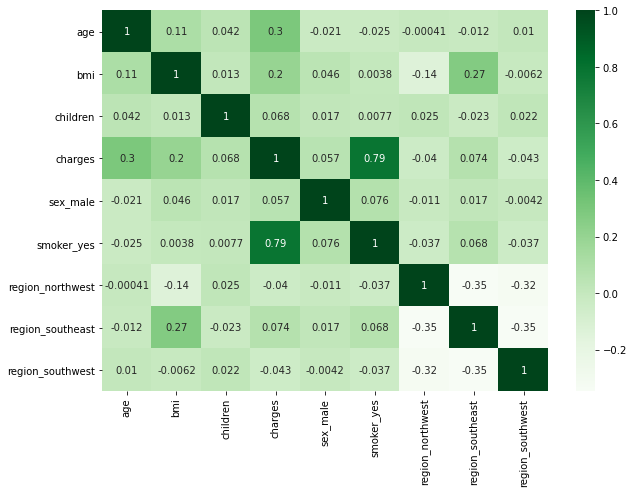

In [73]:
fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(data_2.corr(),annot = True,cmap="Greens")

A strong correlation is observed only with the fact of smoking the patient.  To be honest, I expected a higher correlation with bmi.  Well. We investigate smoking in more detail.

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.
We're importing another useful library that we'll need a few more times. Although it's not necessary, why not :D

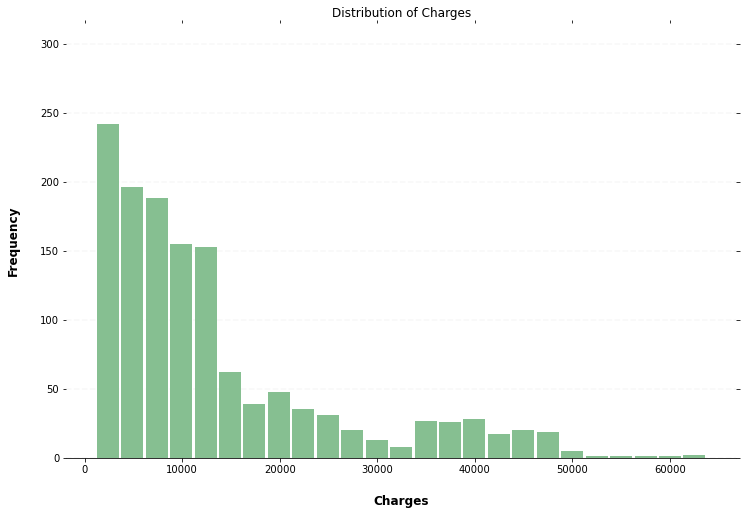

In [40]:
ax = data.hist(column='charges', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Add title
    x.set_title("Distribution of Charges")

    # Set x-axis label
    x.set_xlabel("Charges", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

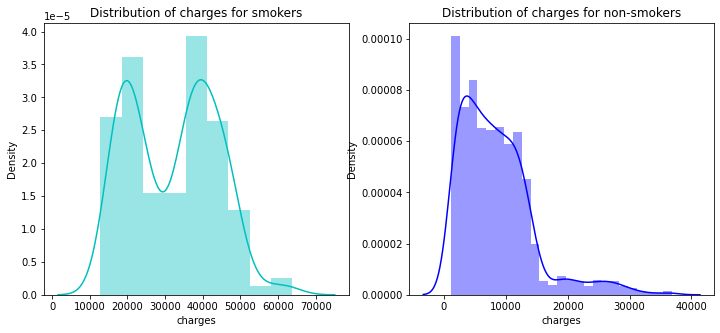

In [43]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data_2[(data_2.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data_2[(data_2.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. Going to check it.

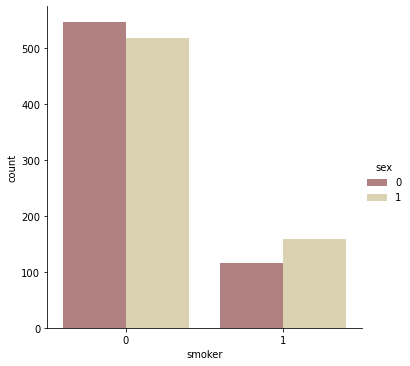

In [44]:

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data_2)

Please note that women are coded with the symbol " 1 "and men - "0". Thus non-smoking people and the truth more. 
Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later.
And some more useful visualizations. 

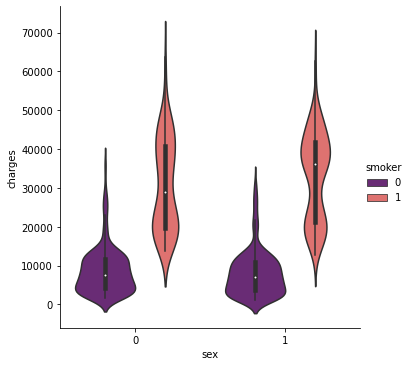

In [45]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data_2, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

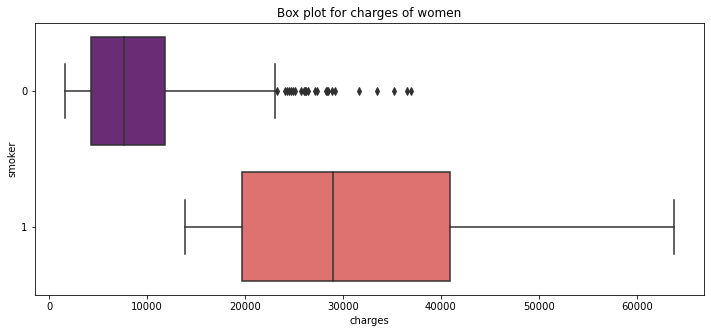

In [48]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data_2[(data_2.sex == 0)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

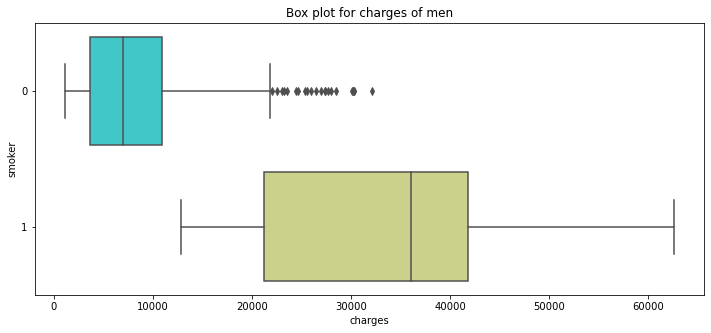

In [49]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data_2[(data_2.sex == 1)] , orient="h", palette = 'rainbow')

Now let's pay attention to the age of the patients.  First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

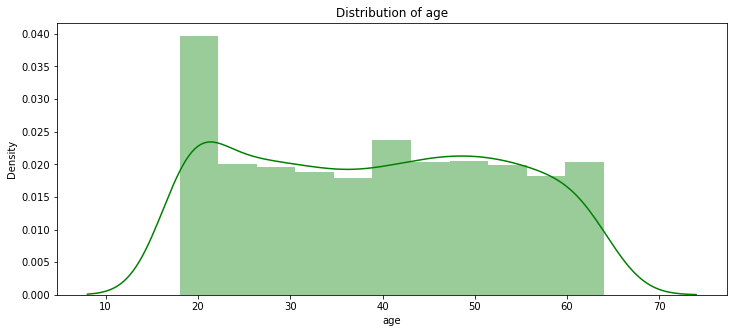

In [50]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data_2["age"], color = 'g')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. 
My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

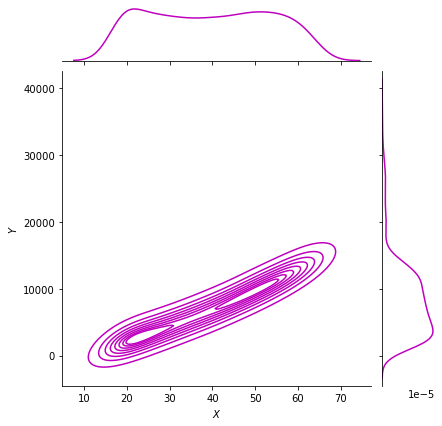

In [52]:
g = sns.jointplot(x="age", y="charges", data = data_2[(data_2.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

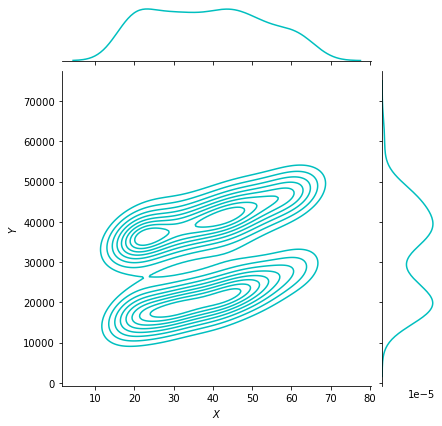

In [53]:
g = sns.jointplot(x="age", y="charges", data = data_2[(data_2.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [55]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data_2[(data_2.smoker == 0)].age,y=data_2[(data_2.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [56]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data_2[(data_2.smoker == 1)].age,y=data_2[(data_2.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

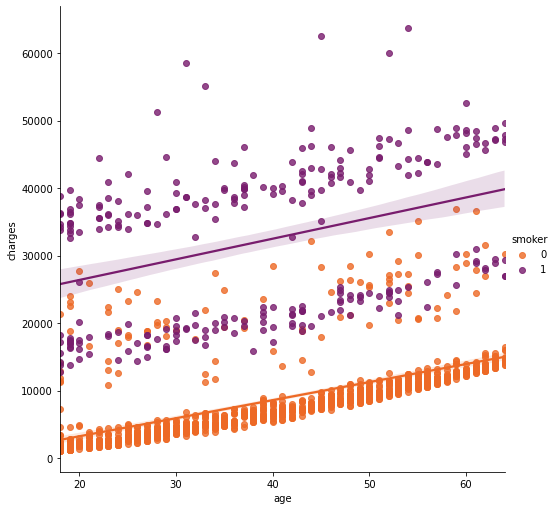

In [57]:

sns.lmplot(x="age", y="charges", hue="smoker", data=data_2, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends!  In smoking people, we do not see such dependence.
I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs.
But we work with what we have!
Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?
![![image.png](attachment:image.png)](https://img-s3.onedio.com/id-573af11b92f0c0f951a8561a/rev-0/raw/s-606439d8c0c1e9e794286a8431f3a54c57f31033.gif)

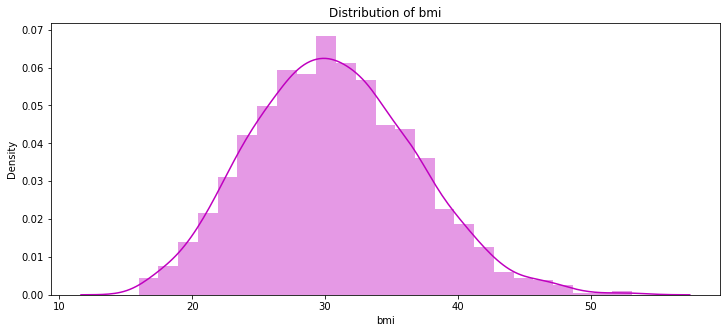

In [58]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

There's something insanely beautiful about this distribution, isn't there?  
The average BMI in patients is 30. I think I should go to the great Google with a question about this indicator. 
![![image.png](attachment:image.png)](http://1j4g1pasf991x0osxuqz6d10.wpengine.netdna-cdn.com/wp-content/uploads/2017/03/BMI-CHART-1024x791.png)
With a value equal to 30 starts obesity.  I also calculated my BMI and now I can safely eat a sandwich. Let's start to explore!
First, let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.


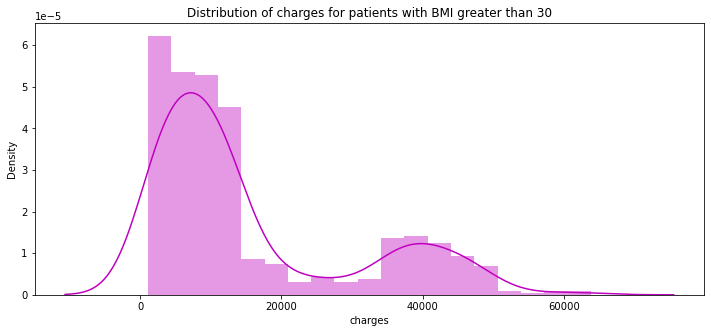

In [59]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

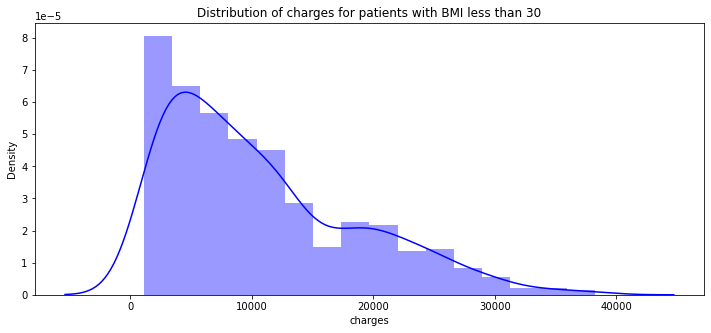

In [60]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment!

Text(0.5, 1.0, 'Distribution of bmi and charges')

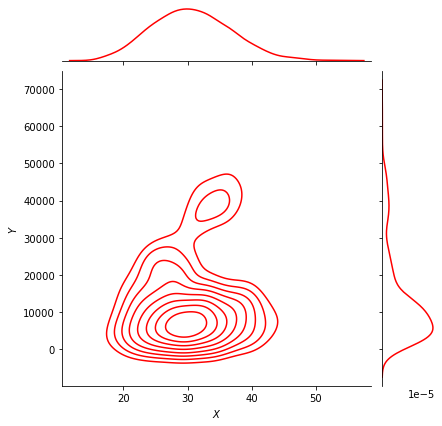

In [61]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


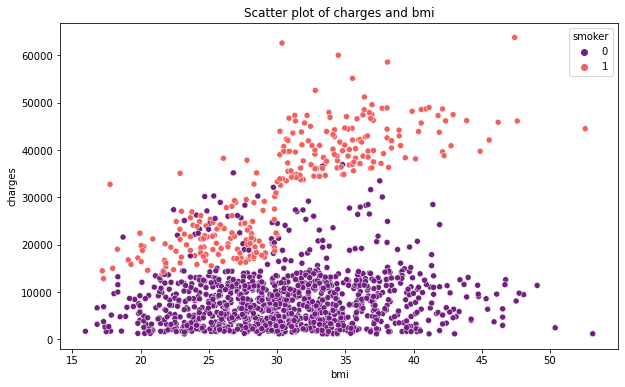

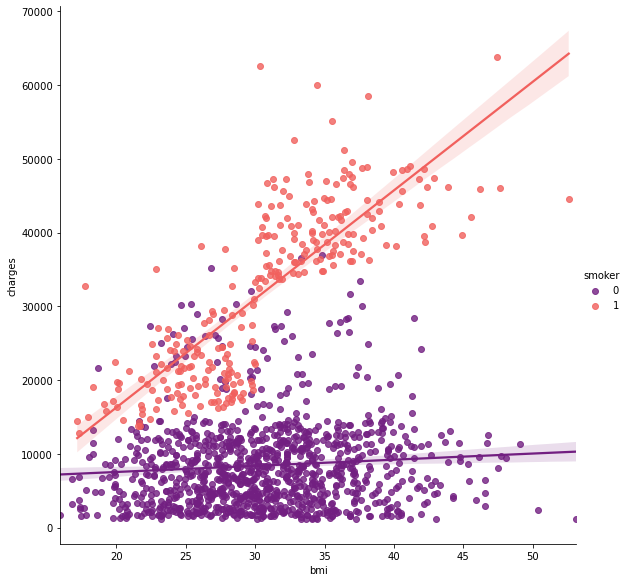

In [62]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data_2,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data_2, palette = 'magma', size = 8)

Let's pay attention to children. First, let's see how many children our patients have.


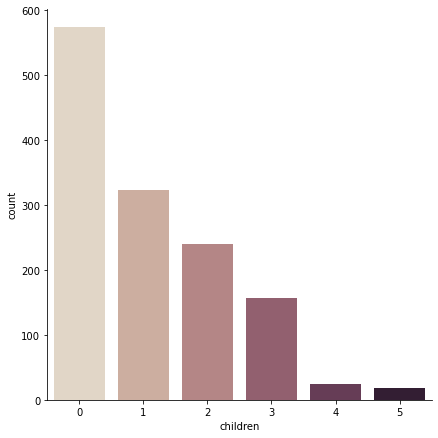

In [63]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:)
I wonder if people who have children smoke.

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

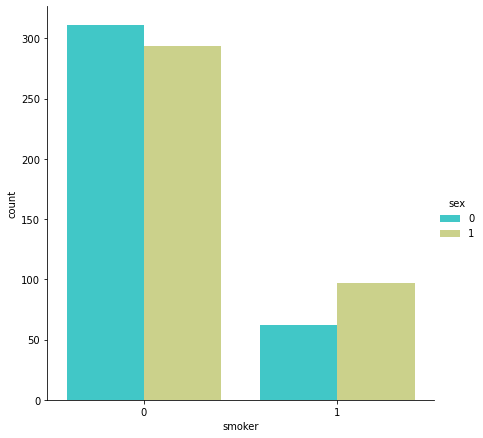

In [64]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data_2[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

Oh oh oh.....
![![image.png](attachment:image.png)](https://www.az-jenata.bg/media/az-jenata/files/galleries/640x480/4c0373972cdd156a2e2c008dc5c0a93a.jpg)
But I am glad that non-smoking parents are much more!

# Modelling


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Fitting LinearRegression......

Scoring LinearRegression.....

Fitting RandomForestRegressor......

Scoring RandomForestRegressor.....



<AxesSubplot:>

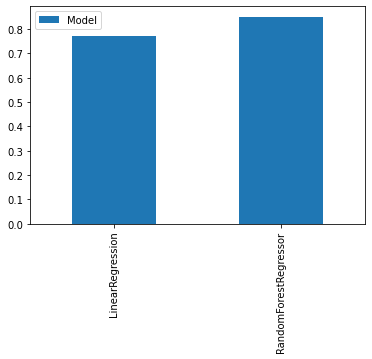

In [88]:
X = data_2.drop(['charges'], axis = 1)
y = data_2.charges


np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

#Choose the right models
models = {'LinearRegression':LinearRegression(),
          'RandomForestRegressor':RandomForestRegressor()}
model_results = {}



for model_name,model in models.items():
    print(f'Fitting {model_name}......')
    model.fit(X_train,y_train)
    print('')
    print(f'Scoring {model_name}.....')
    print('')
    model_results[model_name] = model.score(X_test,y_test)
    
model_compare = pd.DataFrame(model_results,index = ['Model'])
model_compare.T.plot.bar() 

In [106]:
model_compare

,LinearRegression,RandomForestRegressor
Model,0.769612,0.850913


In [142]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
predictive_charges= model.predict(X_test)
print(predictive_charges)

[ 9087.7490273  5080.522964  28261.2957655 12615.6742424 34584.8167875
  7277.459805   2128.78555   14758.0475687  5918.8933478 11517.2371275
 18994.6801499  7081.9187545  4905.9170463 46276.6159069 48675.8335926
 45747.4247443 10912.0395905 43287.7519922  9723.7056588 23650.2732007
  9962.5517543  9385.6614275  1776.5928217  2362.7879575 11592.2117921
 11279.5611552 14214.6243926  7384.7627191 12354.2524587  8884.6579527
  8130.5522592 11809.0809955  3059.8944338  5597.3840555  4176.3992742
  9971.4439806  3573.4902821  8593.5487282 23706.879368  39649.1935854
  6962.6315554  4022.9969642 13039.7229855 14356.7106386  5931.1450501
 16001.8625762 17030.6524293 10797.3937528 41750.7793343  7439.0777882
 14054.3582421  4179.9422157  7316.951698   1732.7379115 11330.9759372
 10340.8453405  3813.6368541 44125.8430254 11964.3631211 13857.9884363
 13930.6829518  7290.0270245 23210.8839802  7795.085727  10760.6254529
  7617.4852613 18217.6856648 12642.754085   8315.8316998  3108.695031
  6615.

In [149]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

In [154]:
X_test['predictive charges'] = predictive_charges
X_test['Actual charges'] = y_test
df_insurance_predict_charges = pd.DataFrame(X_test)

In [167]:
file_name = r'C:\Users\apopalzi\Documents\git\apf\output\insurance_pedict_charges.csv'
df_insurance_predict_charges.to_csv(file_name,encoding='utf-8', index=False)

RandomForest outperformed the LinearRegression model. The next step is to move forward with the RandomForest model and tune the parameters to see if we can improve the performance

# Hyperparameter Tuning - Randomized Search CV

In [95]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in trees
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True,False]

In [96]:
# Create param grid
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}

print(param_grid)

{'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [103]:
rf_Model = RandomForestRegressor()
rf_RandomSearch = RandomizedSearchCV(rf_Model,
                               param_distributions = param_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)


rf_RandomSearch.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 25, 41, 56, 72, 87,
                                                         103, 118, 134, 150]},
                   verbose=True)

In [104]:
rf_RandomSearch.best_params_

{'n_estimators': 56,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [105]:
rf_RandomSearch.score(X_test,y_test)

0.8665435453723997